# Dataset Loading and Preprocessing

Dataset Link: https://www.kaggle.com/datasets/corrieaar/apartment-rental-offers-in-germany

In [1]:
import pandas as pd
import numpy as np

In [2]:
root = 'datasets/'
df = pd.read_csv(root + 'immo_data.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
ndf = df[['serviceCharge', 'heatingType', 'telekomUploadSpeed', 'totalRent']]

In [5]:
ndf.head()

,serviceCharge,heatingType,telekomUploadSpeed,totalRent
0,245.00,central_heating,10.0,840.0
1,134.00,self_contained_central_heating,10.0,NaN
2,255.00,floor_heating,2.4,1300.0
3,58.15,district_heating,40.0,NaN
4,138.00,self_contained_central_heating,NaN,903.0


In [6]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   serviceCharge       261941 non-null  float64
 1   heatingType         223994 non-null  object 
 2   telekomUploadSpeed  235492 non-null  float64
 3   totalRent           228333 non-null  float64
dtypes: float64(3), object(1)
memory usage: 8.2+ MB


In [7]:
ndf.describe()

,serviceCharge,telekomUploadSpeed,totalRent
count,261941.000000,235492.000000,2.283330e+05
mean,151.206113,28.804928,9.013315e+02
std,308.295790,16.337151,3.323833e+04
min,0.000000,1.000000,0.000000e+00
25%,95.000000,10.000000,4.698000e+02
50%,135.000000,40.000000,6.500000e+02
75%,190.000000,40.000000,9.850000e+02
max,146118.000000,100.000000,1.575154e+07


## Handeling heatingTypye categories

In [8]:
ndf.heatingType.value_counts()

central_heating                   128977
district_heating                   24808
gas_heating                        19955
self_contained_central_heating     19087
floor_heating                      17697
oil_heating                         5042
heat_pump                           2737
combined_heat_and_power_plant       1978
night_storage_heater                1341
wood_pellet_heating                  961
electric_heating                     901
stove_heating                        344
solar_heating                        166
Name: heatingType, dtype: int64

In [9]:
def combineHeatingType(x, others):
    if x in others:
        return 'other'
    else:
        return x

In [10]:
others = ndf.heatingType.value_counts()[ndf.heatingType.value_counts() < 3000].index.tolist()
ndf.heatingType = ndf.heatingType.apply(lambda label: combineHeatingType(label, others))

C:\Users\Arman\AppData\Local\Temp\ipykernel_10288\3924095812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.heatingType = ndf.heatingType.apply(lambda label: combineHeatingType(label, others))


In [11]:
ndf.heatingType.value_counts()

central_heating                   128977
district_heating                   24808
gas_heating                        19955
self_contained_central_heating     19087
floor_heating                      17697
other                               8428
oil_heating                         5042
Name: heatingType, dtype: int64

## Removing Illogical and nan values in totalRent column

In [12]:
ndf.totalRent.dropna(inplace=True)
ndf.drop(ndf[ndf.totalRent == 0.0].index, inplace=True)

C:\Users\Arman\AppData\Local\Temp\ipykernel_10288\124718035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.totalRent.dropna(inplace=True)
C:\Users\Arman\AppData\Local\Temp\ipykernel_10288\124718035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.drop(ndf[ndf.totalRent == 0.0].index, inplace=True)


## Handeling nan data

In [13]:
mostRepeted = ndf.columns.to_numpy()[(ndf.columns.dtype == 'object')][0].tolist()

for cols in mostRepeted:
    ndf[cols].fillna(ndf[cols].value_counts().head(1).index[0],inplace = True)

ndf.fillna(ndf._get_numeric_data().mean(),inplace = True)

C:\Users\Arman\AppData\Local\Temp\ipykernel_10288\1479594395.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf[cols].fillna(ndf[cols].value_counts().head(1).index[0],inplace = True)
C:\Users\Arman\AppData\Local\Temp\ipykernel_10288\1479594395.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf[cols].fillna(ndf[cols].value_counts().head(1).index[0],inplace = True)
C:\Users\Arman\AppData\Local\Temp\ipykernel_10288\1479594395.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

## Changing datatypes

In [14]:
numeric_cats = ['telekomUploadSpeed']

for col in numeric_cats:
    ndf[col] = ndf[col].astype('int8')
for col in ndf.columns:
    if (ndf[col].dtype == 'object'):
        ndf[col] = ndf[col].astype('category')
    elif (ndf[col].dtype == 'float'):
        ndf[col] = ndf[col].astype('float32')


C:\Users\Arman\AppData\Local\Temp\ipykernel_10288\639350584.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf[col] = ndf[col].astype('int8')
C:\Users\Arman\AppData\Local\Temp\ipykernel_10288\639350584.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf[col] = ndf[col].astype('float32')
C:\Users\Arman\AppData\Local\Temp\ipykernel_10288\639350584.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [15]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268614 entries, 0 to 268849
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   serviceCharge       268614 non-null  float32 
 1   heatingType         268614 non-null  category
 2   telekomUploadSpeed  268614 non-null  int8    
 3   totalRent           268614 non-null  float32 
dtypes: category(1), float32(2), int8(1)
memory usage: 4.6 MB


## Visualizing Data Distributions

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df_numerics = [col for col in ndf.columns if (ndf[col].dtype == np.float32)]
df_categories = [col for col in ndf.columns if not (ndf[col].dtype == np.float32)]

c:\Fuzulsanj\study\term 6\ML\CS-SBU-MachineLearning-BSc-2022\submits\98222036\ML_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Fuzulsanj\study\term 6\ML\CS-SBU-MachineLearning-BSc-2022\submits\98222036\ML_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


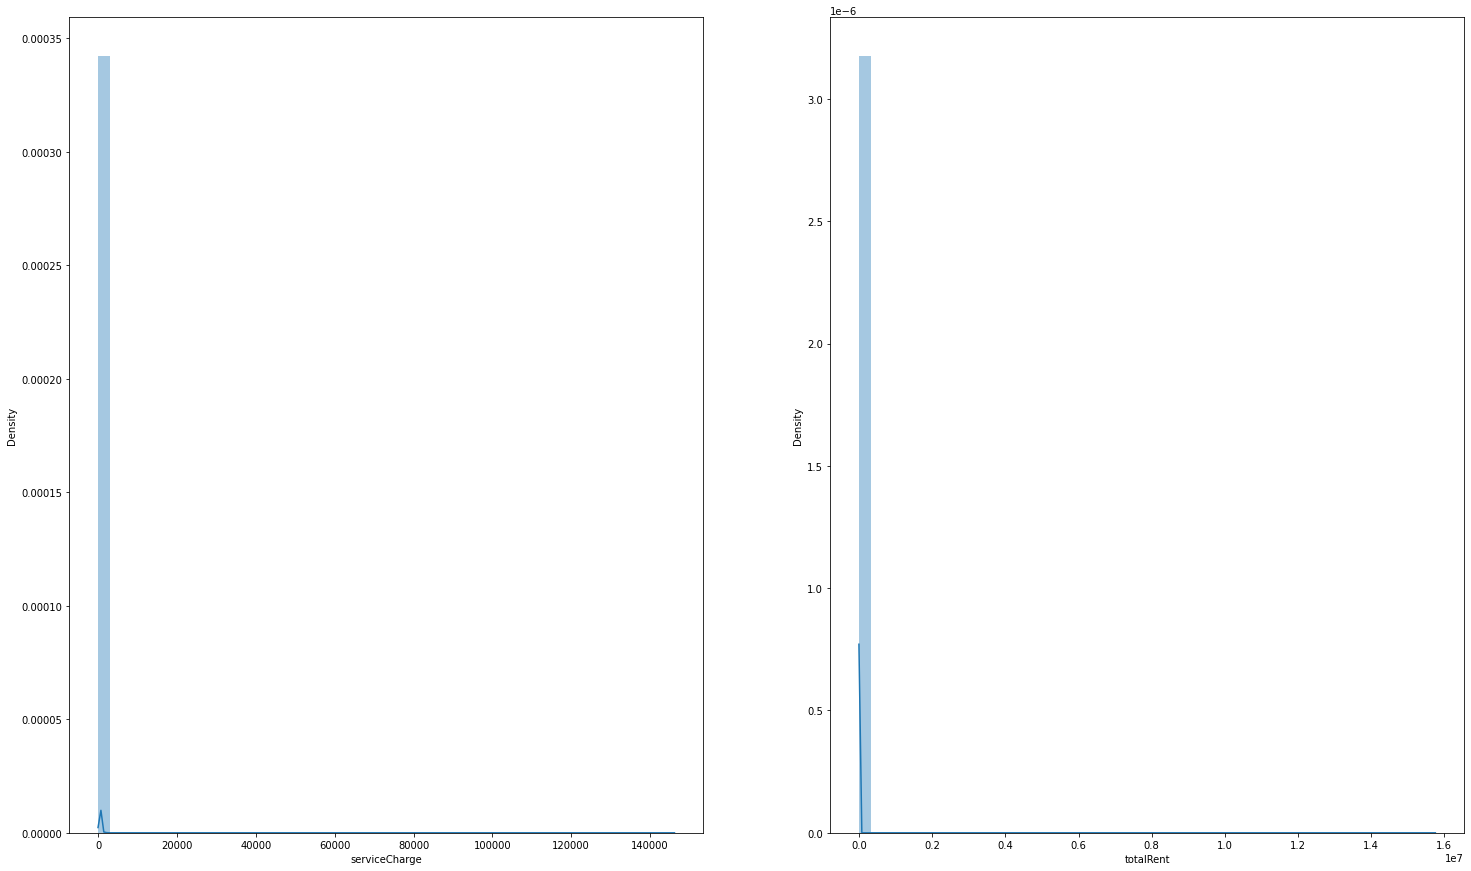

In [18]:
n_rows=1
n_cols=2
plt.figure(figsize=(25, 15))
for i, column in enumerate(df_numerics):
    plt.subplot(n_rows, n_cols, i+1)
    sns.distplot(ndf[column])
plt.show()

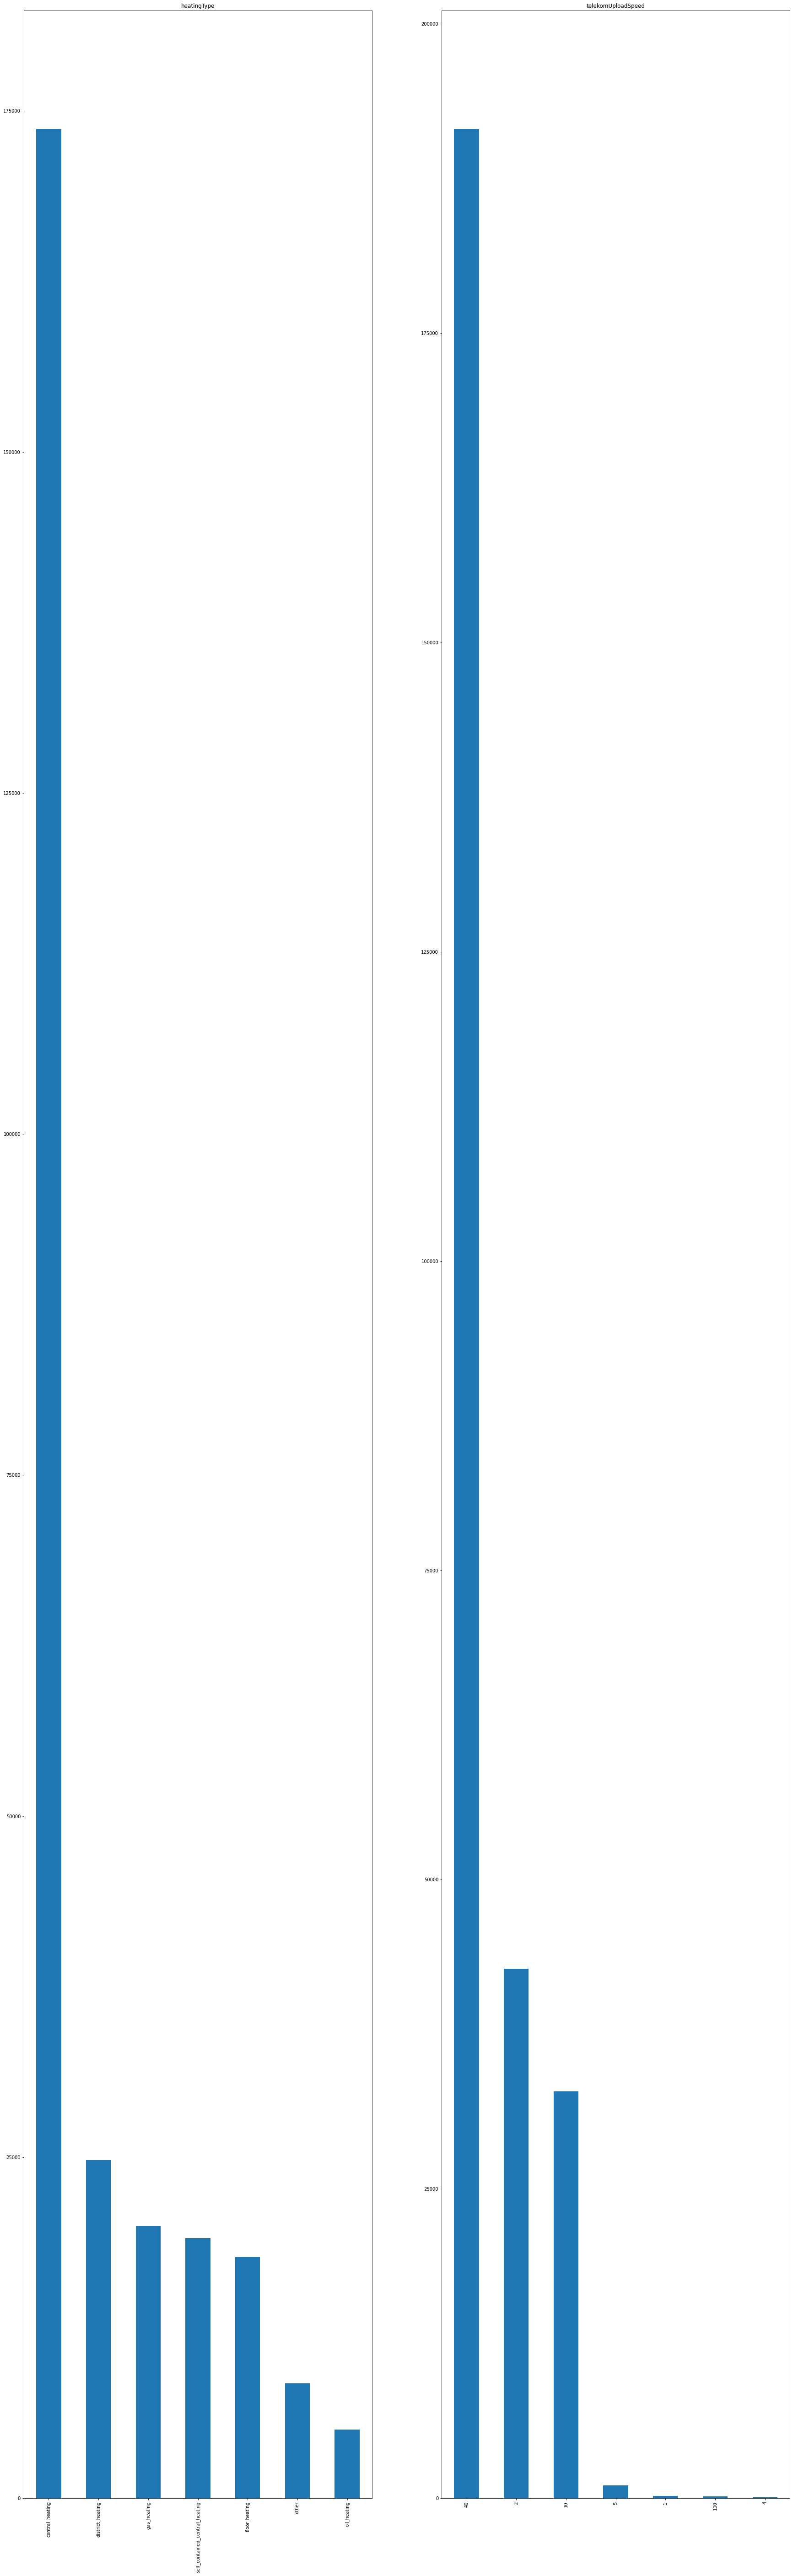

In [19]:
n_rows=1
n_cols=2
plt.figure(figsize=(30, 100))
for i, column in enumerate(df_categories):
    plt.subplot(n_rows, n_cols, i+1)
    ndf[column].value_counts().plot.bar(title=column)
plt.show()

## Removing Outliers by IQR
(since most columns have skewed distribution)

c:\Fuzulsanj\study\term 6\ML\CS-SBU-MachineLearning-BSc-2022\submits\98222036\ML_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Fuzulsanj\study\term 6\ML\CS-SBU-MachineLearning-BSc-2022\submits\98222036\ML_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


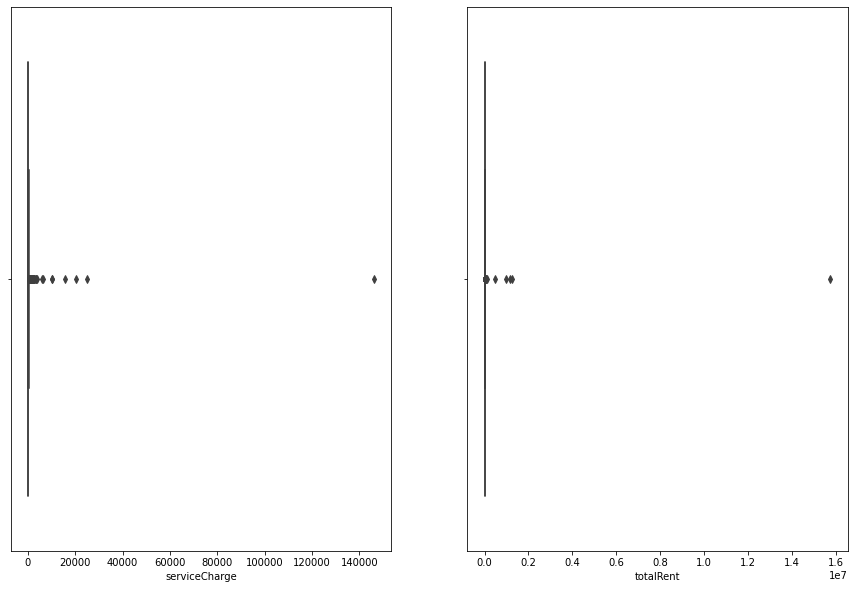

In [20]:
n_rows=1
n_cols=2
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_numerics):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(ndf[column])
plt.show()

In [21]:
for col in df_numerics:
    percentile25 = ndf[col].quantile(0.25)
    percentile75 = ndf[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    ndf = ndf[(ndf[col] >= lower_limit) & (ndf[col] <= upper_limit)]
ndf.shape

(241636, 4)

c:\Fuzulsanj\study\term 6\ML\CS-SBU-MachineLearning-BSc-2022\submits\98222036\ML_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Fuzulsanj\study\term 6\ML\CS-SBU-MachineLearning-BSc-2022\submits\98222036\ML_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


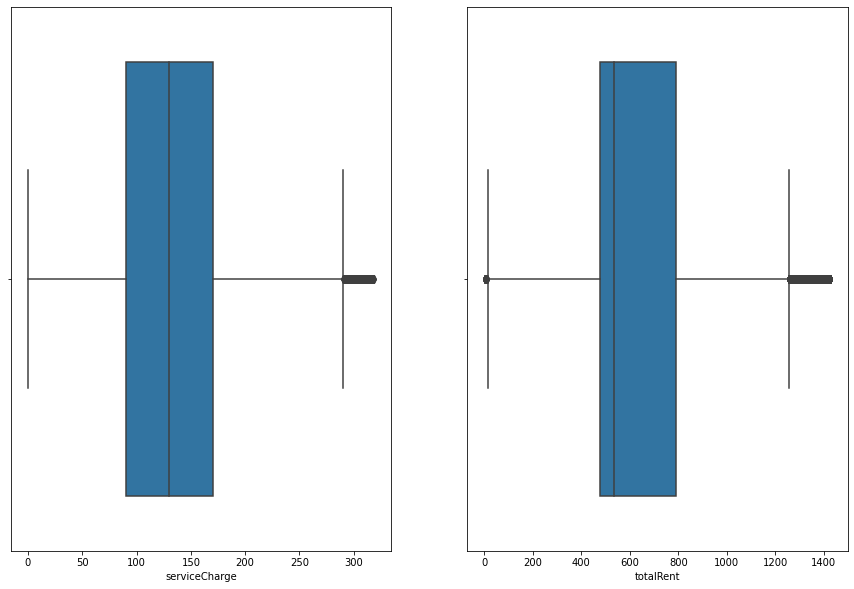

In [22]:
n_rows=1
n_cols=2
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_numerics):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(ndf[column])
plt.show()

# Data Visualization and Analysis

c:\Fuzulsanj\study\term 6\ML\CS-SBU-MachineLearning-BSc-2022\submits\98222036\ML_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Fuzulsanj\study\term 6\ML\CS-SBU-MachineLearning-BSc-2022\submits\98222036\ML_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


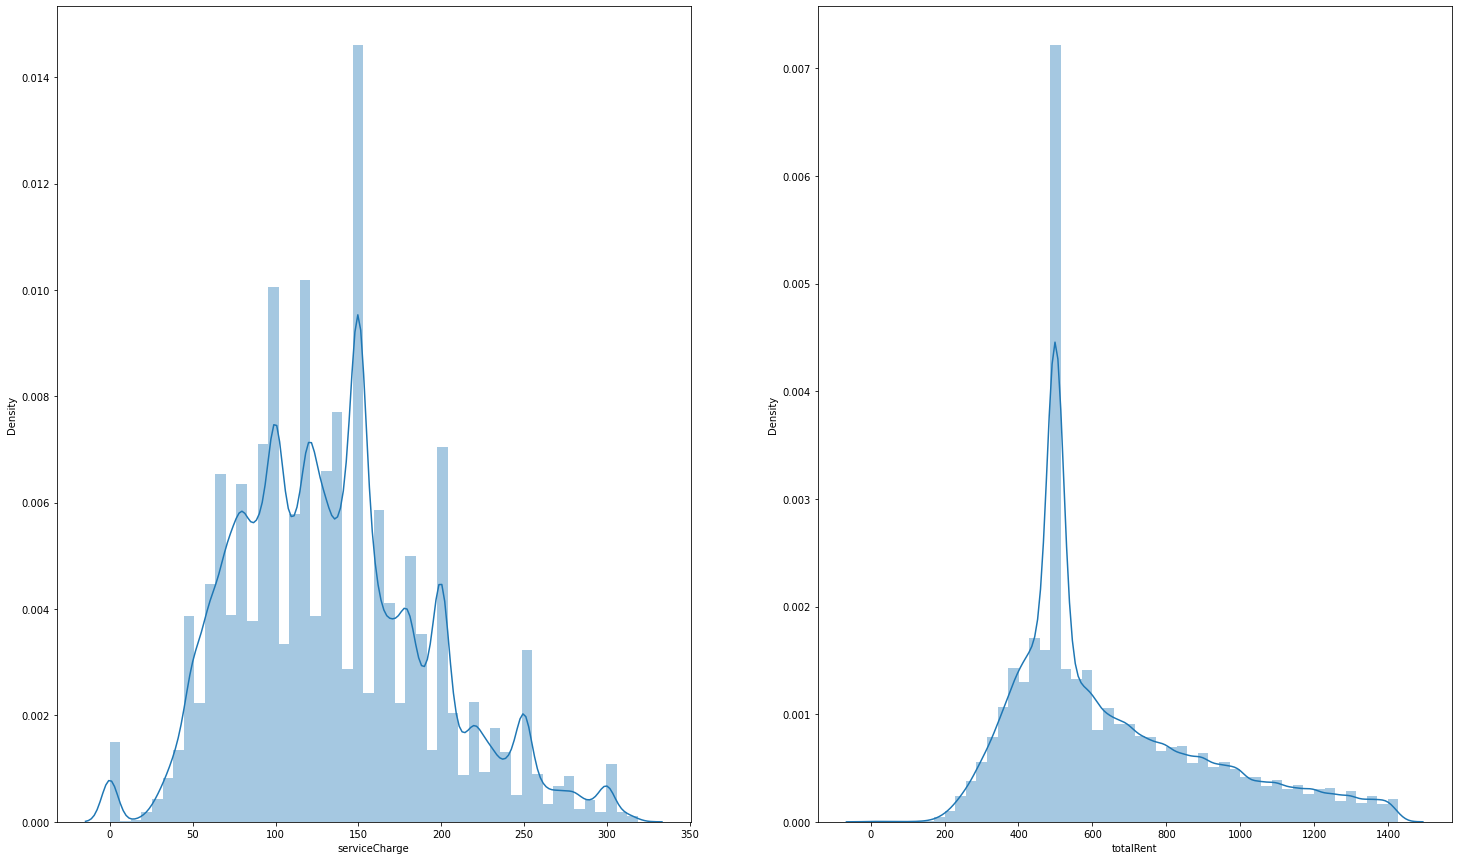

In [23]:
n_rows=1
n_cols=2
plt.figure(figsize=(25, 15))
for i, column in enumerate(df_numerics):
    plt.subplot(n_rows, n_cols, i+1)
    sns.distplot(ndf[column])
plt.show()

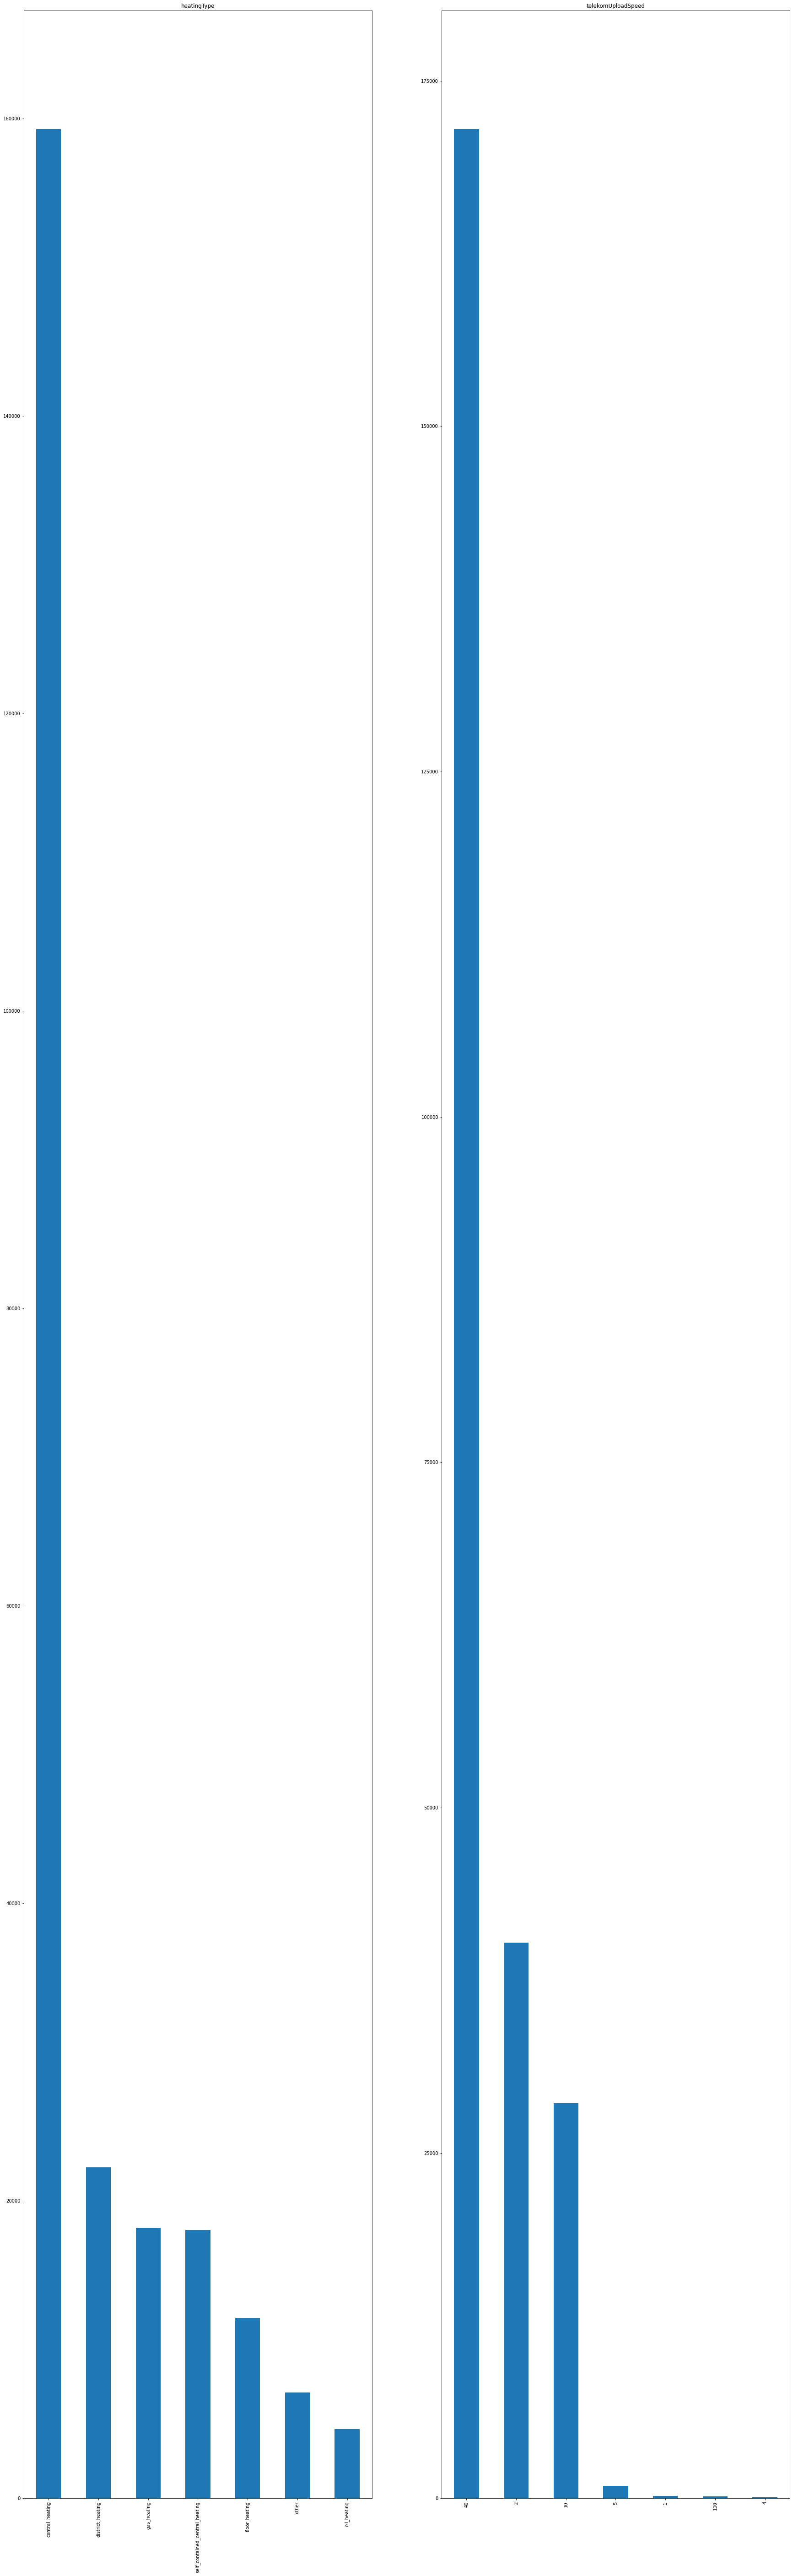

In [24]:
n_rows=1
n_cols=2
plt.figure(figsize=(30, 100))
for i, column in enumerate(df_categories):
    plt.subplot(n_rows, n_cols, i+1)
    ndf[column].value_counts().plot.bar(title=column)
plt.show()

In [25]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241636 entries, 0 to 268849
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   serviceCharge       241636 non-null  float32 
 1   heatingType         241636 non-null  category
 2   telekomUploadSpeed  241636 non-null  int8    
 3   totalRent           241636 non-null  float32 
dtypes: category(1), float32(2), int8(1)
memory usage: 4.1 MB


In [26]:
ndf.describe()

,serviceCharge,telekomUploadSpeed,totalRent
count,241636.000000,241636.000000,241636.000000
mean,134.597504,29.984415,641.950256
std,58.179184,15.961149,263.953949
min,0.000000,1.000000,1.000000
25%,90.000000,10.000000,479.000000
50%,130.000000,40.000000,536.000000
75%,170.000000,40.000000,789.984985
max,318.500000,100.000000,1427.500000


<AxesSubplot:>

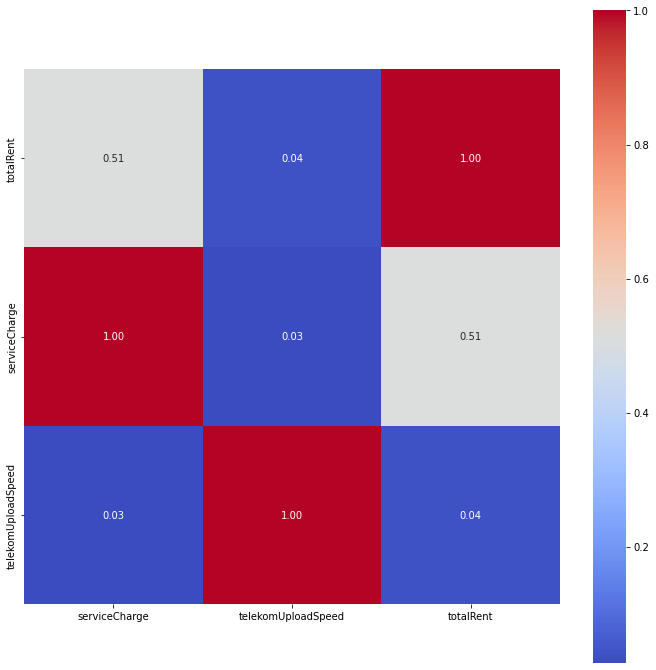

In [27]:
plt.subplots(figsize=(12, 12))
sns.heatmap(ndf.corr().sort_values(by='totalRent',ascending=False), square = True,fmt='.2f' ,annot = True, cmap='coolwarm')

<AxesSubplot:xlabel='totalRent', ylabel='serviceCharge'>

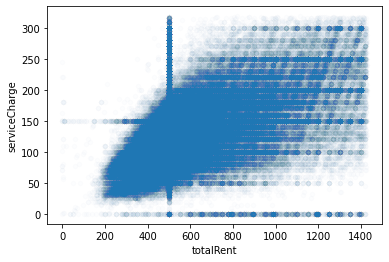

In [28]:
ndf.plot.scatter(x='totalRent', y='serviceCharge', alpha=0.01)

# Model
LinearRegressor

In [29]:
def mse(y, y_pred):
    return ((y_pred - y) ** 2).mean()/2

def mseGradient(X, y, y_pred):
    # MSE = 1/N * (x.theta - y)**2
    # dJ/dw = 1/N 2x (x.theta - y)
    n, d = X.shape
    return (1/n) * np.dot(X.T, y_pred - y)

class SimpleLinearRegressor:
    def __init__(self, criterion=mse, gradient=mseGradient, init_theta=None, alpha=0.01, n_iter=100, printForEachEpoch=None):
        self.alpha = alpha
        self.theta = init_theta
        self.n_iter = n_iter
        self.criterion = criterion
        self.gradient = gradient
        self.print_e = printForEachEpoch
    
    def predict(self, X):
        n, d = X.shape
        X = np.c_[np.ones((n, 1)), X] # adding a column of ones for the bias term
        return np.dot(X, self.theta)
    
    def __forward(self, X):
        return np.dot(X, self.theta)
    
    def fit(self, X, y):
        n, d = X.shape
        if self.theta is None:
            self.theta = np.zeros((d+1, 1))
        X = np.c_[np.ones((n, 1)), X] # adding a column of ones for the bias term
        
        for epoch in range(self.n_iter):
            # forward pass
            y_pred = self.__forward(X)
            # loss
            loss = self.criterion(y, y_pred)
            # gradient
            d_theta = self.gradient(X, y, y_pred)
            # updating theta
            self.theta -= self.alpha * d_theta

            if self.print_e is not None and epoch % self.print_e == 0:
                print(f'epoch {epoch+1}: loss = {loss:.8f}')

## train_test_split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
target = ndf.totalRent
predictors = ndf.drop(['totalRent'], axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

### Onehot Encoding

In [33]:
columns = [col for col in X_train.columns if X_train[col].dtype == 'category']

In [34]:
X_train = pd.get_dummies(X_train, columns=columns)
X_test = pd.get_dummies(X_test, columns=columns)

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193308 entries, 237359 to 135499
Data columns (total 9 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   serviceCharge                               193308 non-null  float32
 1   telekomUploadSpeed                          193308 non-null  int8   
 2   heatingType_central_heating                 193308 non-null  uint8  
 3   heatingType_district_heating                193308 non-null  uint8  
 4   heatingType_floor_heating                   193308 non-null  uint8  
 5   heatingType_gas_heating                     193308 non-null  uint8  
 6   heatingType_oil_heating                     193308 non-null  uint8  
 7   heatingType_other                           193308 non-null  uint8  
 8   heatingType_self_contained_central_heating  193308 non-null  uint8  
dtypes: float32(1), int8(1), uint8(7)
memory usage: 3.7 MB


In [36]:
X_train.head()

,serviceCharge,telekomUploadSpeed,heatingType_central_heating,heatingType_district_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_oil_heating,heatingType_other,heatingType_self_contained_central_heating
237359,140.000000,10,0,0,0,0,1,0,0
24435,151.289993,40,0,0,0,0,0,1,0
221918,215.000000,10,1,0,0,0,0,0,0
105957,60.000000,40,0,0,0,0,0,0,1
55265,55.000000,2,1,0,0,0,0,0,0


## evaluation

### Implemented model
mse

In [37]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy().reshape(-1, 1)
y_test_np = y_test.to_numpy().reshape(-1, 1)

In [38]:
y_train_np.shape

(193308, 1)

In [39]:
model = SimpleLinearRegressor(n_iter=1000, printForEachEpoch=100, alpha=0.00001)

model.fit(X_train_np, y_train_np)

epoch 1: loss = 240880.04148946
epoch 101: loss = 31890.78508492
epoch 201: loss = 31329.24922549
epoch 301: loss = 31062.90027894
epoch 401: loss = 30936.21425664
epoch 501: loss = 30875.60758606
epoch 601: loss = 30846.26543128
epoch 701: loss = 30831.71573526
epoch 801: loss = 30824.16501980
epoch 901: loss = 30819.92593108


In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
y_pred = model.predict(X_test_np)

In [42]:
mean_squared_error(y_true=y_test_np, y_pred=y_pred, squared=False)

250.74976907771432

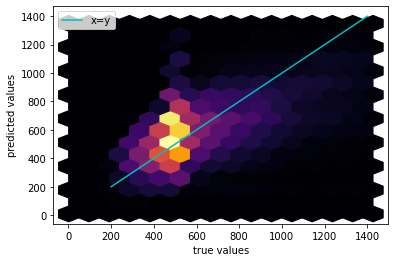

In [43]:
plt.plot((200, 1400), (200, 1400), 'c', label='x=y')
plt.hexbin(y_test_np, y_pred, gridsize=15, cmap='inferno')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend()
# plt.axis([150, 1200, 200, 1200])
plt.show()

### Implemented model
Absolute Error

In [44]:
def absolute_err(y, y_pred):
    return (np.absolute(y_pred - y)).mean()/2

def absGradient(X, y, y_pred):
    n, d = X.shape
    judge = np.sign(y_pred - y)
    return (1/n) * np.dot(X.T, judge)
    

In [45]:
model = SimpleLinearRegressor(n_iter=1000, printForEachEpoch=100, alpha=0.01, criterion=absolute_err, gradient=absGradient)

model.fit(X_train_np, y_train_np)

epoch 1: loss = 320.98033220
epoch 101: loss = 92.72492099
epoch 201: loss = 92.55441901
epoch 301: loss = 92.54323861
epoch 401: loss = 92.53661450
epoch 501: loss = 92.53023744
epoch 601: loss = 92.52387916
epoch 701: loss = 92.51752311
epoch 801: loss = 92.51116835
epoch 901: loss = 92.50481583


In [46]:
y_pred = model.predict(X_test_np)

In [47]:
mean_squared_error(y_true=y_test_np, y_pred=y_pred, squared=False)

251.30108665549847

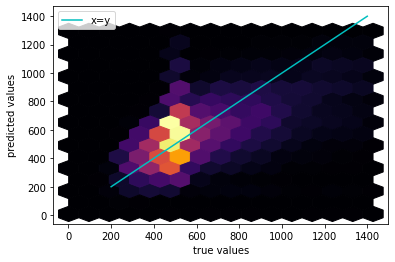

In [48]:
plt.plot((200, 1400), (200, 1400), 'c', label='x=y')
plt.hexbin(y_test_np, y_pred, gridsize=15, cmap='inferno')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend()
# plt.axis([150, 1200, 200, 1200])
plt.show()

### Sklearn model
mse

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
model = LinearRegression(n_jobs=-1)

model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [51]:
y_pred = model.predict(X_test)

In [52]:
mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)

223.21242

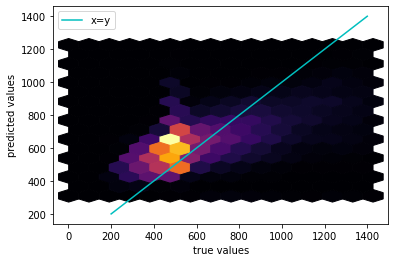

In [53]:
plt.plot((200, 1400), (200, 1400), 'c', label='x=y')
plt.hexbin(y_test, y_pred, gridsize=15, cmap='inferno')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend()
# plt.axis([150, 1200, 200, 1200])
plt.show()

### Lasso

In [55]:
from sklearn.linear_model import Lasso

In [56]:
model = Lasso()

model.fit(X_train, y_train)

Lasso()

In [57]:
y_pred = model.predict(X_test)

In [58]:
mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)

223.32178

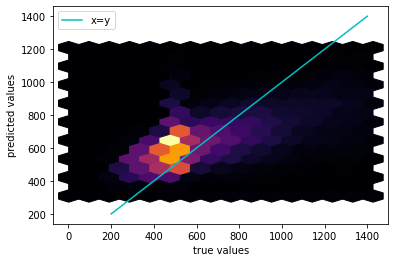

In [59]:
plt.plot((200, 1400), (200, 1400), 'c', label='x=y')
plt.hexbin(y_test, y_pred, gridsize=15, cmap='inferno')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend()
# plt.axis([150, 1200, 200, 1200])
plt.show()

### Ridge

In [63]:
from sklearn.linear_model import Ridge

In [64]:
model = Ridge()

model.fit(X_train, y_train)

c:\Fuzulsanj\study\term 6\ML\CS-SBU-MachineLearning-BSc-2022\submits\98222036\ML_venv\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.55227e-09): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge()

In [65]:
y_pred = model.predict(X_test)

In [66]:
mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)

223.2124

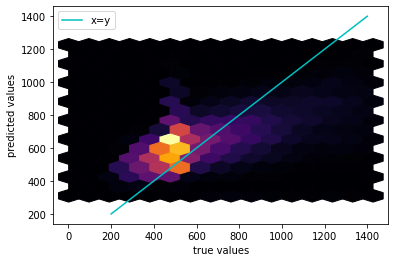

In [67]:
plt.plot((200, 1400), (200, 1400), 'c', label='x=y')
plt.hexbin(y_test, y_pred, gridsize=15, cmap='inferno')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend()
# plt.axis([150, 1200, 200, 1200])
plt.show()